<a href="https://colab.research.google.com/github/UdayLab/geoanalytics/blob/main/tests/conversion/test_CSV2Raster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial on Converting CSV Format into Various Raster Formats

## Step 1: Installing Necessary Ubuntu packages

In [ ]:
!apt update
!apt install -y nco cdo gdal-bin
!which ncrename
!which cdo
!which gdal_translate

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,776 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,750 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jamm

## Step 2: Installing the geeoanalytics package

In [ ]:
!pip install geoanalytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.4/131.4 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 76.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 82.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 78.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 88.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 9.8 MB/s eta 0:00:00
  Created wheel for JsonForm: filename=JsonForm-0.0.2-py3-none-any.whl size=3311 sha256=c2052ce24ccbbed00e51cb26cd652efb999212c9ae1be36

## Step 3: Knowing the information of geoanalytics package

In [ ]:
pip show geoanalytics

Name: geoanalytics
Version: 2025.6.12.3
Summary: This software is being developed at the University of Aizu, Aizu-Wakamatsu, Fukushima, Japan
Home-page: https://github.com/UdayLab/geoanalytics
Author: 
Author-email: Rage Uday Kiran <uday.rage@gmail.com>
License: GPLv3
Location: /usr/local/lib/python3.11/dist-packages
Requires: deprecated, discord.py, fastparquet, matplotlib, mplcursors, networkx, numba, numpy, pami, pandas, Pillow, plotly, psutil, psycopg2-binary, rasterio, resource, scikit-learn, shapely, sphinx, sphinx-rtd-theme, tqdm, urllib3, validators
Required-by: 


## Step 4: Downloading the common CSV File to convert it into a Raster File

### Step 4.1: Download the CSV File

In [ ]:
!wget https://www.dropbox.com/scl/fi/9r7ksk35b8dburjq4gs7n/Moon.csv?rlkey=ffiz57jet8ryinw0eqcroigi2&st=8ft8xl5r&dl=1

--2025-06-14 07:20:59--  https://www.dropbox.com/scl/fi/9r7ksk35b8dburjq4gs7n/Moon.csv?rlkey=ffiz57jet8ryinw0eqcroigi2
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd6dca3e8d1fa605e8254d81231.dl.dropboxusercontent.com/cd/0/inline/CrnwQwR91RyblLOG4hxPB7tPmbDFrms63kPeUMceCxaYlFQ47zxOvHDaICX7ebiPFGxJpkDHc0iM2OvPq0msJO9jAw6Y94KUa6dU5z6QhPOfbpjb56E3hiNV0bSTUcAWyrtj2r-1T42tHk7HzWz8_Iae/file# [following]
--2025-06-14 07:21:00--  https://ucd6dca3e8d1fa605e8254d81231.dl.dropboxusercontent.com/cd/0/inline/CrnwQwR91RyblLOG4hxPB7tPmbDFrms63kPeUMceCxaYlFQ47zxOvHDaICX7ebiPFGxJpkDHc0iM2OvPq0msJO9jAw6Y94KUa6dU5z6QhPOfbpjb56E3hiNV0bSTUcAWyrtj2r-1T42tHk7HzWz8_Iae/file
Resolving ucd6dca3e8d1fa605e8254d81231.dl.dropboxusercontent.com (ucd6dca3e8d1fa605e8254d81231.dl.dropboxusercontent.com)... 162.125.4.15, 2620:100:6

In [ ]:
!mv Moon.csv?rlkey=ffiz57jet8ryinw0eqcroigi2 Moon.csv

### Step 4.2: Read it as a dataframe

In [ ]:
import pandas as pd
df = pd.read_csv('Moon.csv',sep='\t')
df

,x,y,1,2,3,4,5,6,7,8,9
0,1061317.265,-485173.607,1928,3446,3859,3913,4026,3999,4236,5245,6513
1,1061332.071,-485173.607,1924,3480,3876,3930,4059,3996,4243,5234,6518
2,1061346.877,-485173.607,1904,3476,3834,3923,4047,3992,4238,5222,6523
3,1061361.684,-485173.607,1874,3452,3801,3897,3959,3988,4228,5210,6518
4,1061376.490,-485173.607,1907,3464,3777,3868,3974,3983,4218,5198,6504
...,...,...,...,...,...,...,...,...,...,...,...
4194299,1091566.583,-515482.151,2090,3719,4007,3996,4117,4056,4310,5374,6633
4194300,1091581.390,-515482.151,2098,3734,4038,4020,4177,4083,4327,5389,6659
4194301,1091596.196,-515482.151,2114,3767,4046,4040,4213,4110,4332,5393,6685
4194302,1091611.002,-515482.151,2123,3813,4019,4056,4214,4136,4331,5397,6711


#### Rename the first 2 columns as `x` and `y`

#### Use the below furished code if the first 2 column names are not `x` and `y`

In [ ]:
#df.rename(columns={df.columns[0]: 'x', df.columns[1]: 'y'}, inplace=True)
#df

## Step 5: Converting CSV Files into Various Raster Files

In [ ]:
from geoanalytics.conversion import CSV2Raster

### Step 5.1: Converting it into a TIFF File

In [ ]:
TiffConv = CSV2Raster.CSV2Raster(dataframe=df, outputFile='Moon.tiff')

In [ ]:
TiffConv.run()

/usr/local/lib/python3.11/dist-packages/osgeo/gdal.py:312: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


(0, '')
(0, '')
(0, '')
(0, '')
(0, '')
(0, '')
(0, '')
(0, '')
(0, '')
(139, 'Segmentation fault (core dumped)')
(0, '')
(0, 'Input file size is 2048, 2048\n0...10...20...30...40...50...60...70...80...90...100 - done.')
(0, '')


### Step 5.2: Converting it into a NetCDF format

In [ ]:
NCconv = CSV2Raster.CSV2Raster(dataframe=df, outputFile='Moon.nc')
NCconv.run()

(0, '')
(0, '')
(0, '')
(0, '')
(0, '')
(0, '')
(0, '')
(0, '')
(0, '')
(139, 'Segmentation fault (core dumped)')
(0, '')


## Step 6: Visualizing the converted Raster Files

### Step 6.1: Visualizing the TIFF file

In [ ]:
from geoanalytics.visualization import TiffViewer

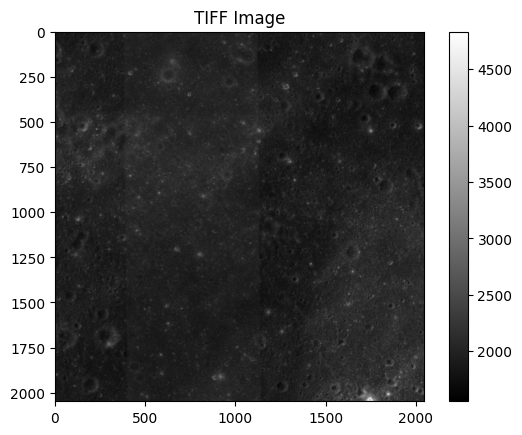

In [ ]:
viewer1 = TiffViewer.TiffViewer(inputFile='Moon.tiff')
viewer1.run()

### Step 6.2: Visualizing the NetCDF File

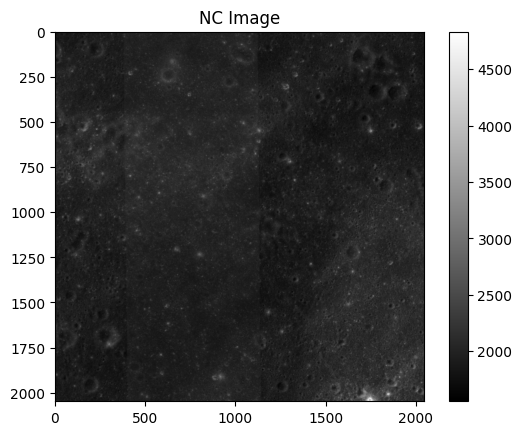

In [ ]:
from geoanalytics.visualization import NetCDFViewer
viewer2 = NetCDFViewer.NetCDFViewer(inputFile='Moon.nc')
viewer2.run()